In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import torch.nn.functional as F

#df = pd.read_csv("demographic.csv")
df = pd.read_csv('demographic.csv')

df = df[df['subject'] != 1]
df = df[df['subject'] != 6]
df = df[df['subject'] != 16]
df = df[df['subject'] != 27]
print(df.head)

# Preprocess the data
# Convert categorical variable to numerical using LabelEncoder
le = LabelEncoder()
df[' gender'] = le.fit_transform(df[' gender'])

# Scale the numerical features using StandardScaler
scaler = StandardScaler()
df[[' age', ' education']] = scaler.fit_transform(df[[' age', ' education']])

# Separate the data into schizophrenia and non-schizophrenia groups
df_schizophrenia = df[df[' group'] == 1]
df_non_schizophrenia = df[df[' group'] == 0]

# Create the input and output data for the ANN model
# The input data consists of the age and education features
# The output data consists of a binary variable indicating schizophrenia diagnosis
X = df[[' age', ' education', ' gender']].to_numpy()
y = df[' group'].to_numpy()
device = "cpu"
X = torch.from_numpy(X).to(torch.float32).to(device)
y = torch.from_numpy(y).to(torch.float32).to(device)
# y = torch.reshape(y,(77,1))

y = F.one_hot(y.to(torch.int64), num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

        
print(X_train.shape, y_train.shape)


<bound method NDFrame.head of     subject   group  gender   age   education
1         2       0       M    39        17.0
2         3       0       M    53        18.0
3         4       0       M    52        15.0
4         5       0       M    41        16.0
6         7       0       F    61        16.0
..      ...     ...     ...   ...         ...
76       77       1       M    28        13.0
77       78       1       F    32        16.0
78       79       1       M    37        16.0
79       80       1       M    33        13.0
80       81       1       M    56        13.0

[77 rows x 5 columns]>
torch.Size([61, 3]) torch.Size([16, 3]) torch.Size([61, 2]) torch.Size([16, 2])
torch.Size([61, 3]) torch.Size([61, 2])


In [ ]:

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3,3) 
        self.fc2 = nn.Linear(3,3)
        self.fc3 = nn.Linear(3,2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
def train(data_x, data_y, learning_rate, n_epochs):

  device = "cuda" if torch.cuda.is_available() else "cpu"
  print(f"Using {device} device")
  model = Net().to(device)
  print("MODEL:", model)

  loss_function = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  losses = []
  for epoch in range(n_epochs):
    correct, accuracy = 0, 0
    pred_y = model(data_x)
    # print(pred_y, data_y)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    # _, predicted = torch.max(pred_y.data, 1)
    # print(pred_y.argmax(dim=1), data_y.argmax(dim=1))
    correct += (pred_y.argmax(dim=1) == data_y.argmax(dim=1)).float().sum()

    print("\nEpoch:", epoch)
    accuracy = 100 * correct / len(data_y)
    print("Accuracy = {}".format(accuracy))
    print("Loss = ", loss.item())

    if epoch%10 == 0:
      learning_rate = learning_rate/0.01

  return model, losses

In [ ]:
model1, losses1 = train(X_train, y_train.float(), 0.01, 200)    

Using cpu device
MODEL: Net(
  (fc1): Linear(in_features=3, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=2, bias=True)
)

Epoch: 0
Accuracy = 62.295082092285156
Loss =  0.44437098503112793

Epoch: 1
Accuracy = 62.295082092285156
Loss =  0.4196911156177521

Epoch: 2
Accuracy = 62.295082092285156
Loss =  0.39795562624931335

Epoch: 3
Accuracy = 62.295082092285156
Loss =  0.3792850375175476

Epoch: 4
Accuracy = 62.295082092285156
Loss =  0.36288514733314514

Epoch: 5
Accuracy = 62.295082092285156
Loss =  0.34826424717903137

Epoch: 6
Accuracy = 62.295082092285156
Loss =  0.3352421820163727

Epoch: 7
Accuracy = 62.295082092285156
Loss =  0.3237203061580658

Epoch: 8
Accuracy = 62.295082092285156
Loss =  0.3134385347366333

Epoch: 9
Accuracy = 62.295082092285156
Loss =  0.30431029200553894

Epoch: 10
Accuracy = 62.295082092285156
Loss =  0.29636770486831665

Epoch: 11
Accuracy = 62.295082092285156
Loss =  0.

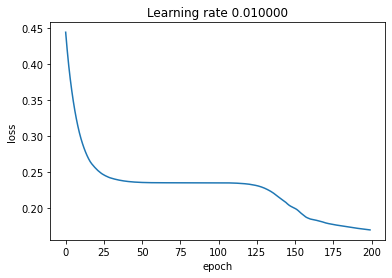

In [ ]:
plt.plot(losses1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(0.01))
plt.show()